# Titanic Survival Pracitce Data Analysis

In this notebook I will be aiming to predict which passengers survived the titanic sinking. 

## Installing libraries

In [2]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Exploring the dataset 

### What

I will aim to explore this dataset using python and pandas to see the structure and identify any missing values and get an overview of any data types and distributions. 

### How

I will be using basic data analysis libraries such as pandas, matplotlib and seaborn. 

## Why

to gain insight into the dataset to allow better comprehension of what the raw data is telling me.

## EDA

1.	Understand the Data: Look at the first few rows using df.head() and the last few with df.tail(). Use df.info() to get an overview of the dataset, including data types and non-null counts.
2.	Summary Statistics: Use df.describe() to get summary statistics for numerical columns, which can highlight central tendencies, dispersion, and potential outliers.
3.	Missing Values: Identify missing data with df.isnull().sum(). Decide whether to remove or impute these values.
4.	Data Distribution: Plot histograms, boxplots, or density plots for numerical columns to understand their distribution.
5.	Categorical Data: Use bar plots or count plots for categorical columns to see the distribution of categories.
6.	Correlation: Check the correlation between numerical features and the target variable using a correlation matrix or heatmap.
7.	Feature Relationships: Use scatter plots, pair plots, or grouped boxplots to explore relationships between features.
8.	Initial Insights: Summarize your initial findings and note any patterns, anomalies, or areas for further investigation.


### Summary Statistics

Notes on the dataset:

- survival: 0 or 1
- pclass: 1 = 1st, 2 = 2nd, 3 = 3rd
- sex: gender of person
- Age: age in years
- sibsp: number of siblings/spouses aboard
- parch: number of parents/children aboard
- ticket: ticket number
- fare: price of the fare
- cabin: cabin number
- embarked: Point of Embarkation

In [4]:
train_data = pd.read_csv("train.csv")
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
train_data.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
num_rows, num_columns = train_data.shape

print(f"Rows: {num_rows} \t Columns: {num_columns}")

Rows: 891 	 Columns: 12


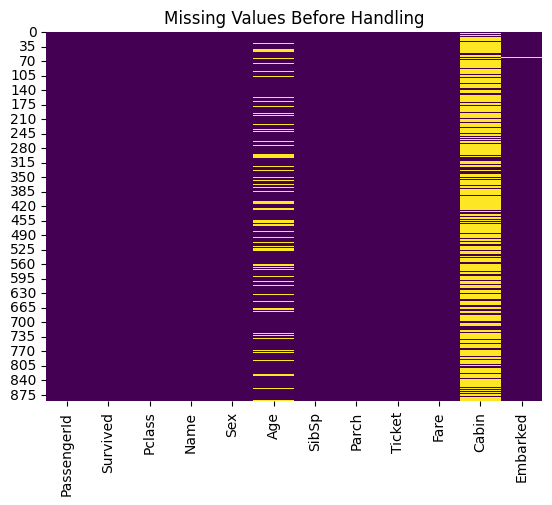

In [9]:
sns.heatmap(train_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Before Handling")
plt.show()

### Handling Missing Data

Here is where I will replace the missing data with more informative descriptions or remove it completely. 


In [10]:
# finding the missing data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Understanding the Missing Data

From this I can see that the `Cabin` and the `Age` have a lot of missing values with Embarked missing two entries. 

To tackle the missing data we can: 
- fill the missing data with the median/mode or predictive data.
- drop the column completely if there is too much missing data. 
- or flag it as missing. 

In [11]:
print(train_data["Age"].describe())
# median = 28 years old

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [12]:
# Fill missing ages with the median
train_data['Age'].fillna(train_data["Age"].median(), inplace=True)

# NOTE: Or we can fill based on the correlating pclass age. 
# train_data['Age'] = train_data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

# print out the modified dataframe to check 
print(train_data['Age'])
print(train_data.isnull().sum())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
# Next we will drop the cabin information as there is too much missing data to accurately make any analysis on. 
train_data.drop(columns=['Cabin'], inplace = True)
print(f"Columns Names: {train_data.columns} \n")
print(train_data.isnull().sum())

Columns Names: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object') 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


Above I have dealt with the `Cabin` attribute by dropping it from the table as it doesn't seem to be useful to my EDA. 

---

In [14]:
# Deal with the `Embarked` column by adding in the mode common location. 
# Visualise
print(train_data['Embarked'].mode())

train_data['Embarked'].fillna(value='S', inplace=True)
print(train_data.isnull().sum())

0    S
Name: Embarked, dtype: object
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Visualising the dataset after dealing with Missing Values

Now that I have finished with the missing values. I shall visualise the data to get a better idea of how the values are distributed and any possible trends in the data.


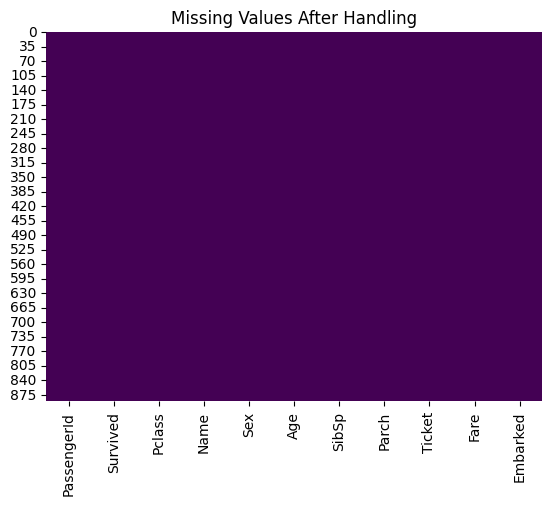

In [15]:
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values After Handling")
plt.show()

## Feature Engineering, Exploratory Visualisation and Data Modelling Preparation.

After handling the missing data I know need to delve into **Feature Engineering** and **Exploratory Visualisation** or my dataset in preparation for Data Modelling. 

Glancing at the sibsp and parch columsn we can combine them into a new column and name it `Family`. 

In [16]:
train_data['Family Size'] = train_data['SibSp'] + train_data['Parch'] + 1 # including the passenger

# check the dataframe
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Family Size  
0      0         A/5 21171   7.2500        S            2  
1      0          PC 17599  71.2833        C            2  
2      0  STON/O2. 3101282   7.9250        S            1  
3      0            113803  53.1000        S            2  
4      0            

Let us make it easier to see if someone is travelling alone by adding in a column for "alone"

In [17]:
train_data["Is Alone"] = (train_data["Family Size"] == 1).astype(int)

Noticing how there are many different titles that highlight the individuals social status we can extract these as well using Regex. 

In [18]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify and group the titles

train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
                                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train_data['Title'] = train_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')


### Farebands 

Categorising the fares into bins of [1, 2, 3, 4] to help with machine learning in the future.

In [19]:
train_data['Fareband'] = pd.qcut(train_data['Fare'], 4, labels=[1, 2, 3, 4])

In [20]:
# Lets do the same with the ages to help with interpretability

train_data['Ageband'] = pd.cut(train_data['Age'], bins=[0, 12, 18, 35, 60, 120], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])


In [21]:
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Family Size  Is Alone Title  \
0      0         A/5 21171   7.2500        S            2         0    Mr   
1      0          PC 17599  71.2833        C            2         0   Mrs   
2      0  STON/O2. 3101282   7.9250        S            1         1  Miss   
3      0    

### Exploratory Data Analysis

Now that i've added some features to make it easier for my exploratory data analysis. We can delve into it. 

I now want to gain insights into the data and refine some of the features i've added. So now I shall start visualising statistics about:
- Sex - Survival
- Class - Survival
- Family Size - Survival

as well as: 
- Age - Survival
- Fare - Survival

etc, and also complete pairplots to see if there is any relationship between pairs and survival. 

<Axes: xlabel='Sex', ylabel='Survived'>

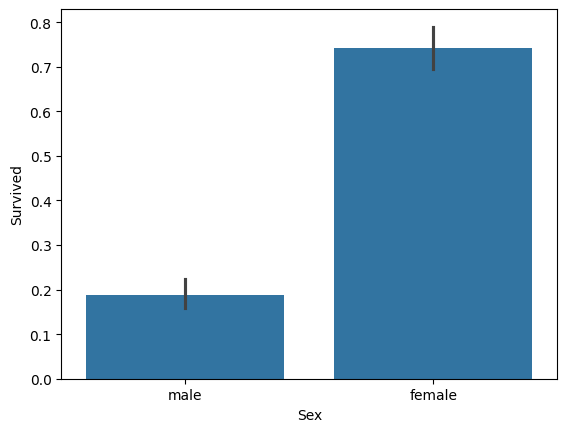

In [22]:
# Linear Graph - Sex v Survival 
sns.barplot(x="Sex", y='Survived', data=train_data)

<Axes: xlabel='Pclass', ylabel='Survived'>

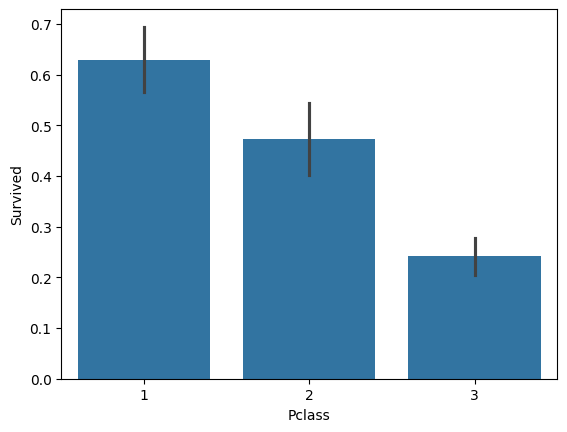

In [23]:
# Bar Graph - pclass and survival 
sns.barplot(x='Pclass', y='Survived', data=train_data)

<Axes: xlabel='Family Size', ylabel='Survived'>

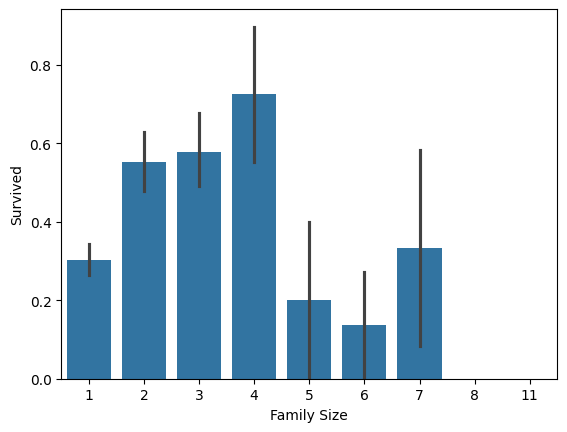

In [24]:
sns.barplot(x='Family Size', y='Survived', data=train_data)

In [25]:
# reprint the columns names
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family Size', 'Is Alone',
       'Title', 'Fareband', 'Ageband'],
      dtype='object')


### Exploring Correlations

I'm going to explore the numerical features as well as the categorical features to gain 
better insight into which attributes will contribute more to my prediction. 

<Axes: >

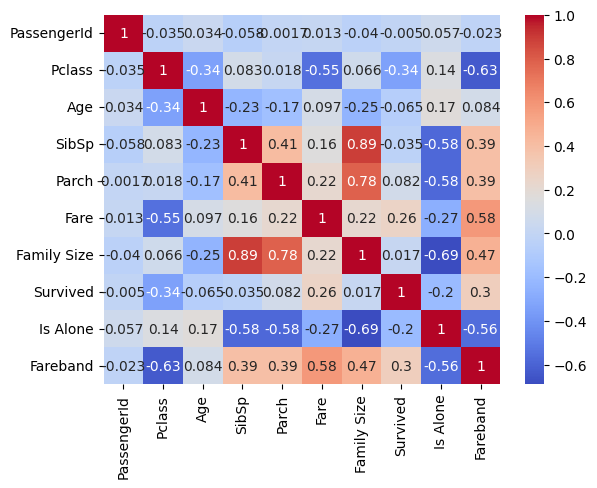

In [26]:
# To do a numerical analysis I will make a new dataframe of the numerical columns 
numerical_columns = ['PassengerId', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'Family Size', 'Survived', 'Is Alone',
       'Fareband'] 
numerical_train_data = train_data[numerical_columns]
numerical_train_data
sns.heatmap(numerical_train_data.corr(), annot=True, cmap='coolwarm')

### Heatmap for correlative relationships between the attributes of the passengers
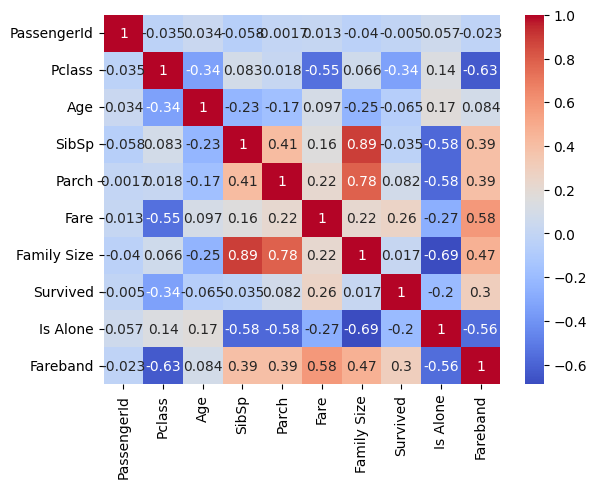

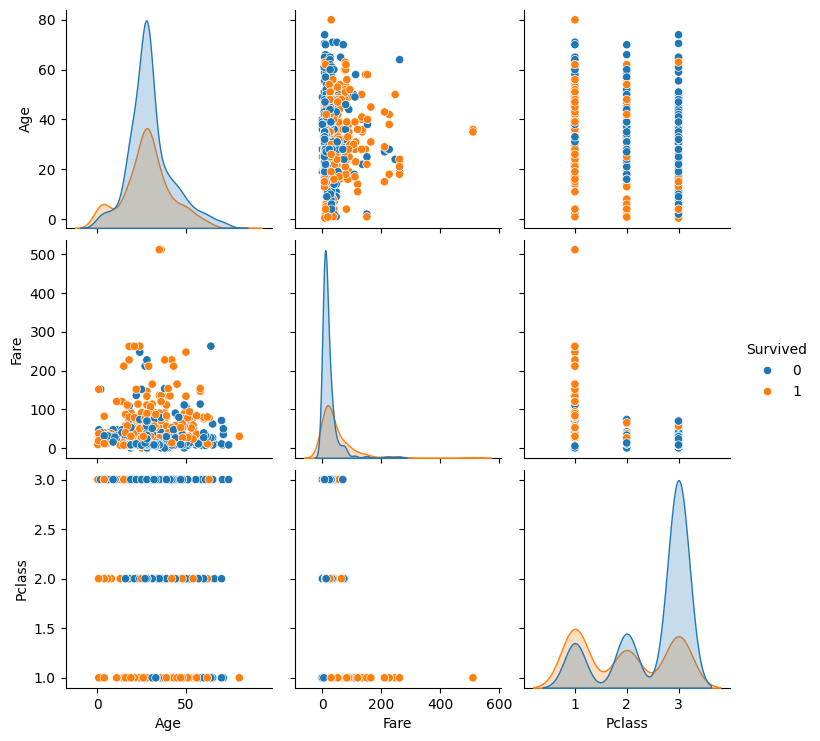

In [27]:
# Making a pariplot for the key relationships

sns.pairplot(train_data, hue='Survived', vars=['Age', 'Fare', 'Pclass'])

In [28]:
# converting categorical attributes and encoding to numerical using get_dummies()
encoded_train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'Title', 'Ageband'], drop_first=True)
encoded_train_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ...   
886                              Montvila, Rev. Juozas  27.0      0      0   
887                       Graham, Miss. Margaret Edith  19.0      0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  28.0      1      2   
889                              Behr, Mr. Karl Howell  26.0      0      0   
890                                Dooley, Mr. Patrick  32.0      0      0   

               Ticket     Fare  Family Size  ...  Embarked_Q Embarked_S  \
0           A/5 21171   7.2500            2  ...       False       True   
1            PC 17599  71.2833            2  ...       False      False   
2    STON/O2. 3101282   7.9250            1  ...       False       True   
3              113803  53.1000            2  ...       False       True   
4              373450   8.0500            1  ...       False       True   
..                ...      ...          ...  ...         ...        ...   
886            211536  13.0000            1  ...       False       True   
887            112053  30.0000            1  ...       False       True   
888        W./C. 6607  23.4500            4  ...       False       True   
889            111369  30.0000            1  ...       False      False   
890            370376   7.7500            1  ...        True      False   

     Title_Miss  Title_Mr  Title_Mrs  Title_Rare  Ageband_Teenager  \
0         False      True      False       False             False   
1         False     False       True       False             False   
2          True     False      False       False             False   
3         False     False       True       False             False   
4         False      True      False       False             False   
..          ...       ...        ...         ...               ...   
886       False     False      False        True             False   
887        True     False      False       False             False   
888        True     False      False       False             False   
889       False      True      False       False             False   
890       False      True      False       False             False   

     Ageband_Young Adult  Ageband_Adult  Ageband_Senior  
0                   True          False           False  
1                  False           True           False  
2                   True          False           False  
3                   True          False           False  
4                   True          False           False  
..                   ...            ...             ...  
886                 True          False           False  
887                 True          False           False  
888                 True          False           False  
889                 True          False           False  
890                 True          False           False  

[891 rows x 23 columns]

In [29]:
# Removing attributes such as name, ticket, cabin and passengerId that doesnt help with contribution
encoded_train_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
encoded_train_data.head()

Survived  Pclass   Age  SibSp  Parch     Fare  Family Size  Is Alone  \
0         0       3  22.0      1      0   7.2500            2         0   
1         1       1  38.0      1      0  71.2833            2         0   
2         1       3  26.0      0      0   7.9250            1         1   
3         1       1  35.0      1      0  53.1000            2         0   
4         0       3  35.0      0      0   8.0500            1         1   

  Fareband  Sex_male  Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Title_Mrs  \
0        1      True       False        True       False      True      False   
1        4     False       False       False       False     False       True   
2        2     False       False        True        True     False      False   
3        4     False       False        True       False     False       True   
4        2      True       False        True       False      True      False   

   Title_Rare  Ageband_Teenager  Ageband_Young Adult  Ageband_Adult  \
0       False             False                 True          False   
1       False             False                False           True   
2       False             False                 True          False   
3       False             False                 True          False   
4       False             False                 True          False   

   Ageband_Senior  
0           False  
1           False  
2           False  
3           False  
4           False

In [30]:
from sklearn.model_selection import train_test_split

# split data set into training and testing sets

features = encoded_train_data.drop('Survived', axis=1)
target = encoded_train_data['Survived']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [31]:
# Now choosing a model to train

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(features_train, target_train)

target_prediction = model.predict(features_test)
print("Accuracy: ", accuracy_score(target_test, target_prediction))
print(classification_report(target_test, target_prediction))

Accuracy:  0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



The above Linear Regression model works well to predict those that dont survive but has a much lower f1-score for predicting those that do. 
To address this flaw in the model I will edit my linear regression to adopt a better approach for the variables.
I will be going for a scalable approach for this model and using `saga` as my solver, and experimenting with my Regularisation parameter (C). Smaller `c` = more regularisation and vice versa. 

For more regular with a C value of 0.1,

```
Accuracy:  0.7877094972067039
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179
```

For less regular with a C value of 0.9, 

```
Accuracy:  0.7932960893854749
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179
```

They are relatively close. 

I will now try again with liblinear solver.

In [32]:
more_regular = LogisticRegression(C=0.1, solver='saga', random_state=42, max_iter=100000)
less_regular = LogisticRegression(C=0.9, solver='saga', random_state=42, max_iter=100000)

In [33]:
more_regular.fit(features_train, target_train)

target_prediction = more_regular.predict(features_test)
print("Accuracy: ", accuracy_score(target_test, target_prediction))
print(classification_report(target_test, target_prediction))

Accuracy:  0.7877094972067039
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [34]:
less_regular.fit(features_train, target_train)

target_prediction = less_regular.predict(features_test)
print("Accuracy: ", accuracy_score(target_test, target_prediction))
print(classification_report(target_test, target_prediction))

Accuracy:  0.7932960893854749
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [35]:
more_regular = LogisticRegression(C=0.1, solver='liblinear', random_state=42, max_iter=100000)
less_regular = LogisticRegression(C=0.9, solver='liblinear', random_state=42, max_iter=100000)

In [36]:
more_regular.fit(features_train, target_train)

target_prediction = more_regular.predict(features_test)
print("Accuracy: ", accuracy_score(target_test, target_prediction))
print(classification_report(target_test, target_prediction))

Accuracy:  0.7877094972067039
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [37]:
less_regular.fit(features_train, target_train)

target_prediction = less_regular.predict(features_test)
print("Accuracy: ", accuracy_score(target_test, target_prediction))
print(classification_report(target_test, target_prediction))

Accuracy:  0.7932960893854749
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



In [38]:
# Using GridSearchCV to automate searching for the best parameter

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000000), param_grid=param_grid, cv = 5, scoring='accuracy')
grid_search.fit(features_train, target_train)
print(f"Best Parameter: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Eval best model
print(f"Best Model Accuracy: {best_model.score(features_test, target_test)}")

Best Parameter: {'C': 10, 'solver': 'liblinear'}
Best Model Accuracy: 0.8156424581005587


### Linear Regression Model

it seems that the best accuracy a Linear Regression model can perform at is an accuracy of 81.56%

Best Parameter: {'C': 10, 'solver': 'liblinear'}

Best Model Accuracy: 0.8156424581005587


In [39]:
c = 10
solver = 'liblinear'

model = LogisticRegression(C=c, solver=solver, max_iter=1000000, random_state=42)
model.fit(features_train, target_train)

target_prediction = model.predict(features_test)
print("Accuracy: ", accuracy_score(target_test, target_prediction))
print(classification_report(target_test, target_prediction))

Accuracy:  0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



## Random Forest Trees

After doing my Logistic Regression approach I will now see if a decision tree approach will work better. 

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# training and testing datasets
X = encoded_train_data.drop('Survived', axis=1)
y = encoded_train_data['Survived']

# Assuming 'X' is your features DataFrame and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape after splitting
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

## I can use my existing features and target variables.
# Train the model
dt = DecisionTreeClassifier(random_state=32521731)
dt.fit(X_train, y_train)

# Make predictions on the test set
dt_prediction = dt.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_prediction)

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Decision Tree Classification Report: \n{classification_report(y_test, dt_prediction)}")

X_train shape: (712, 19)
y_train shape: (712,)
X_test shape: (179, 19)
y_test shape: (179,)
Decision Tree Accuracy: 0.7821229050279329
Decision Tree Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       105
           1       0.72      0.78      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



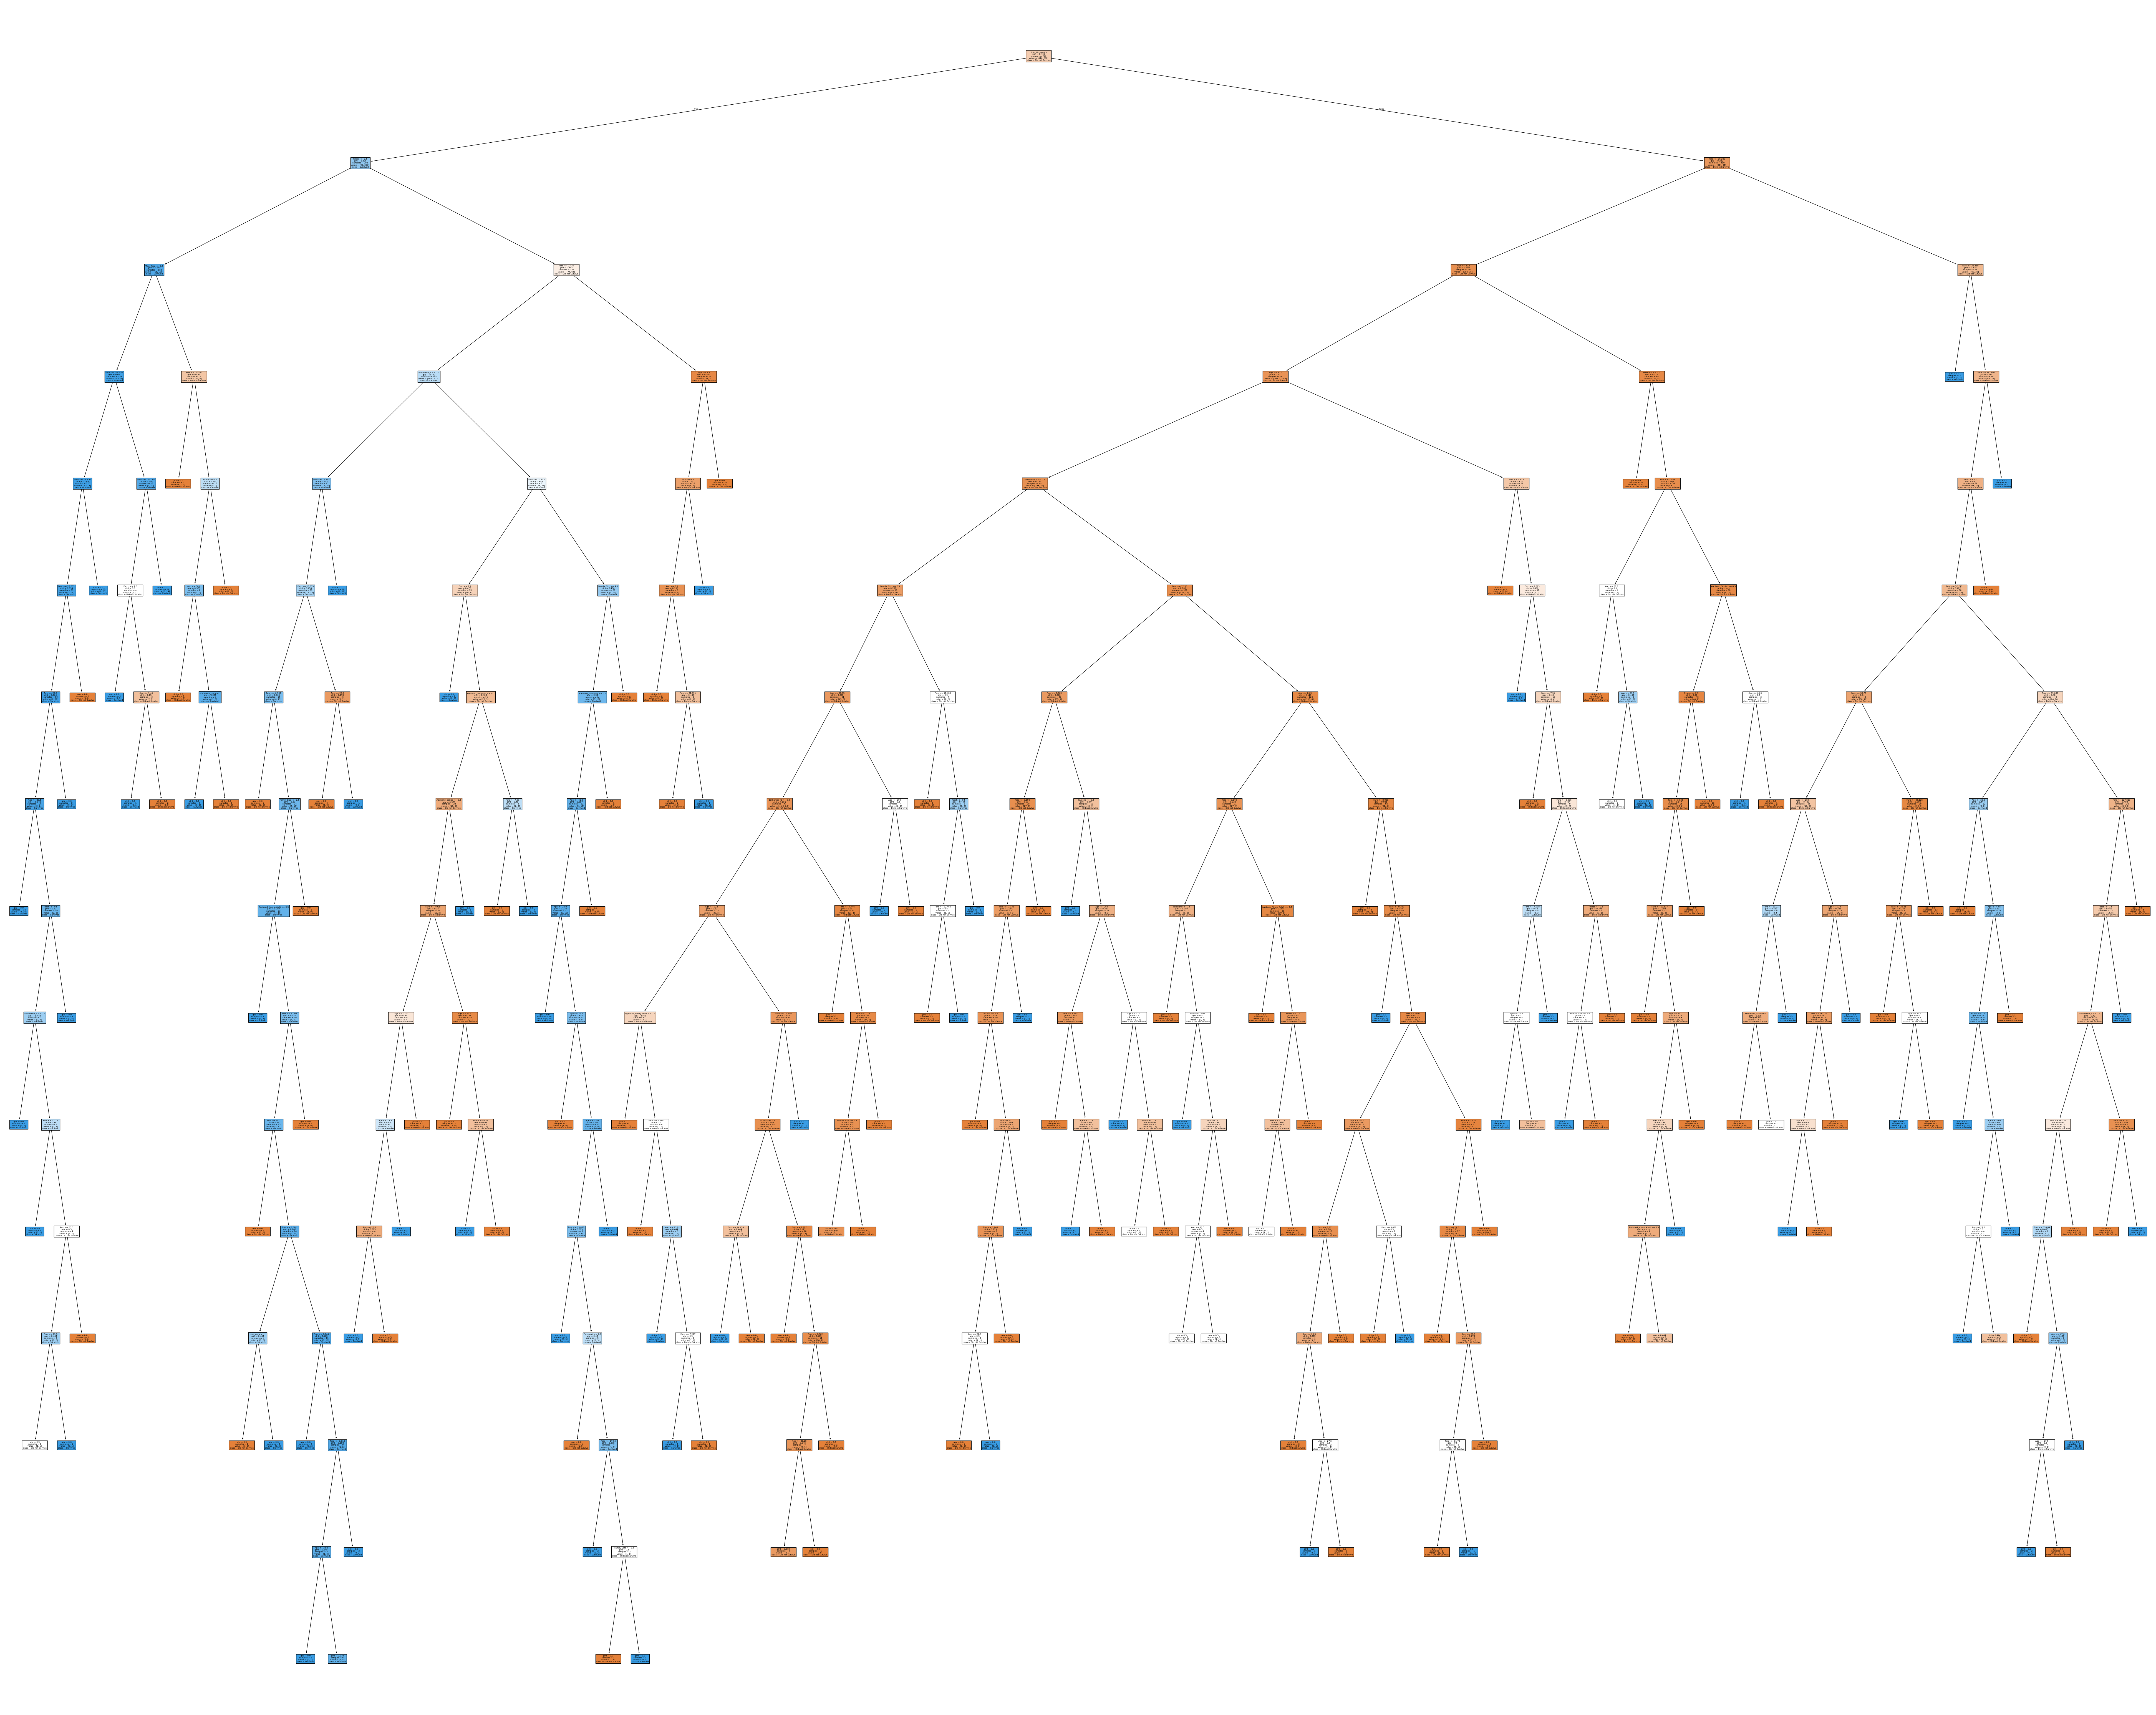

In [41]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100,80))
plot_tree(dt, feature_names=X_train.columns, class_names=["Did not Survive", "Survived"], filled = True)
plt.show()

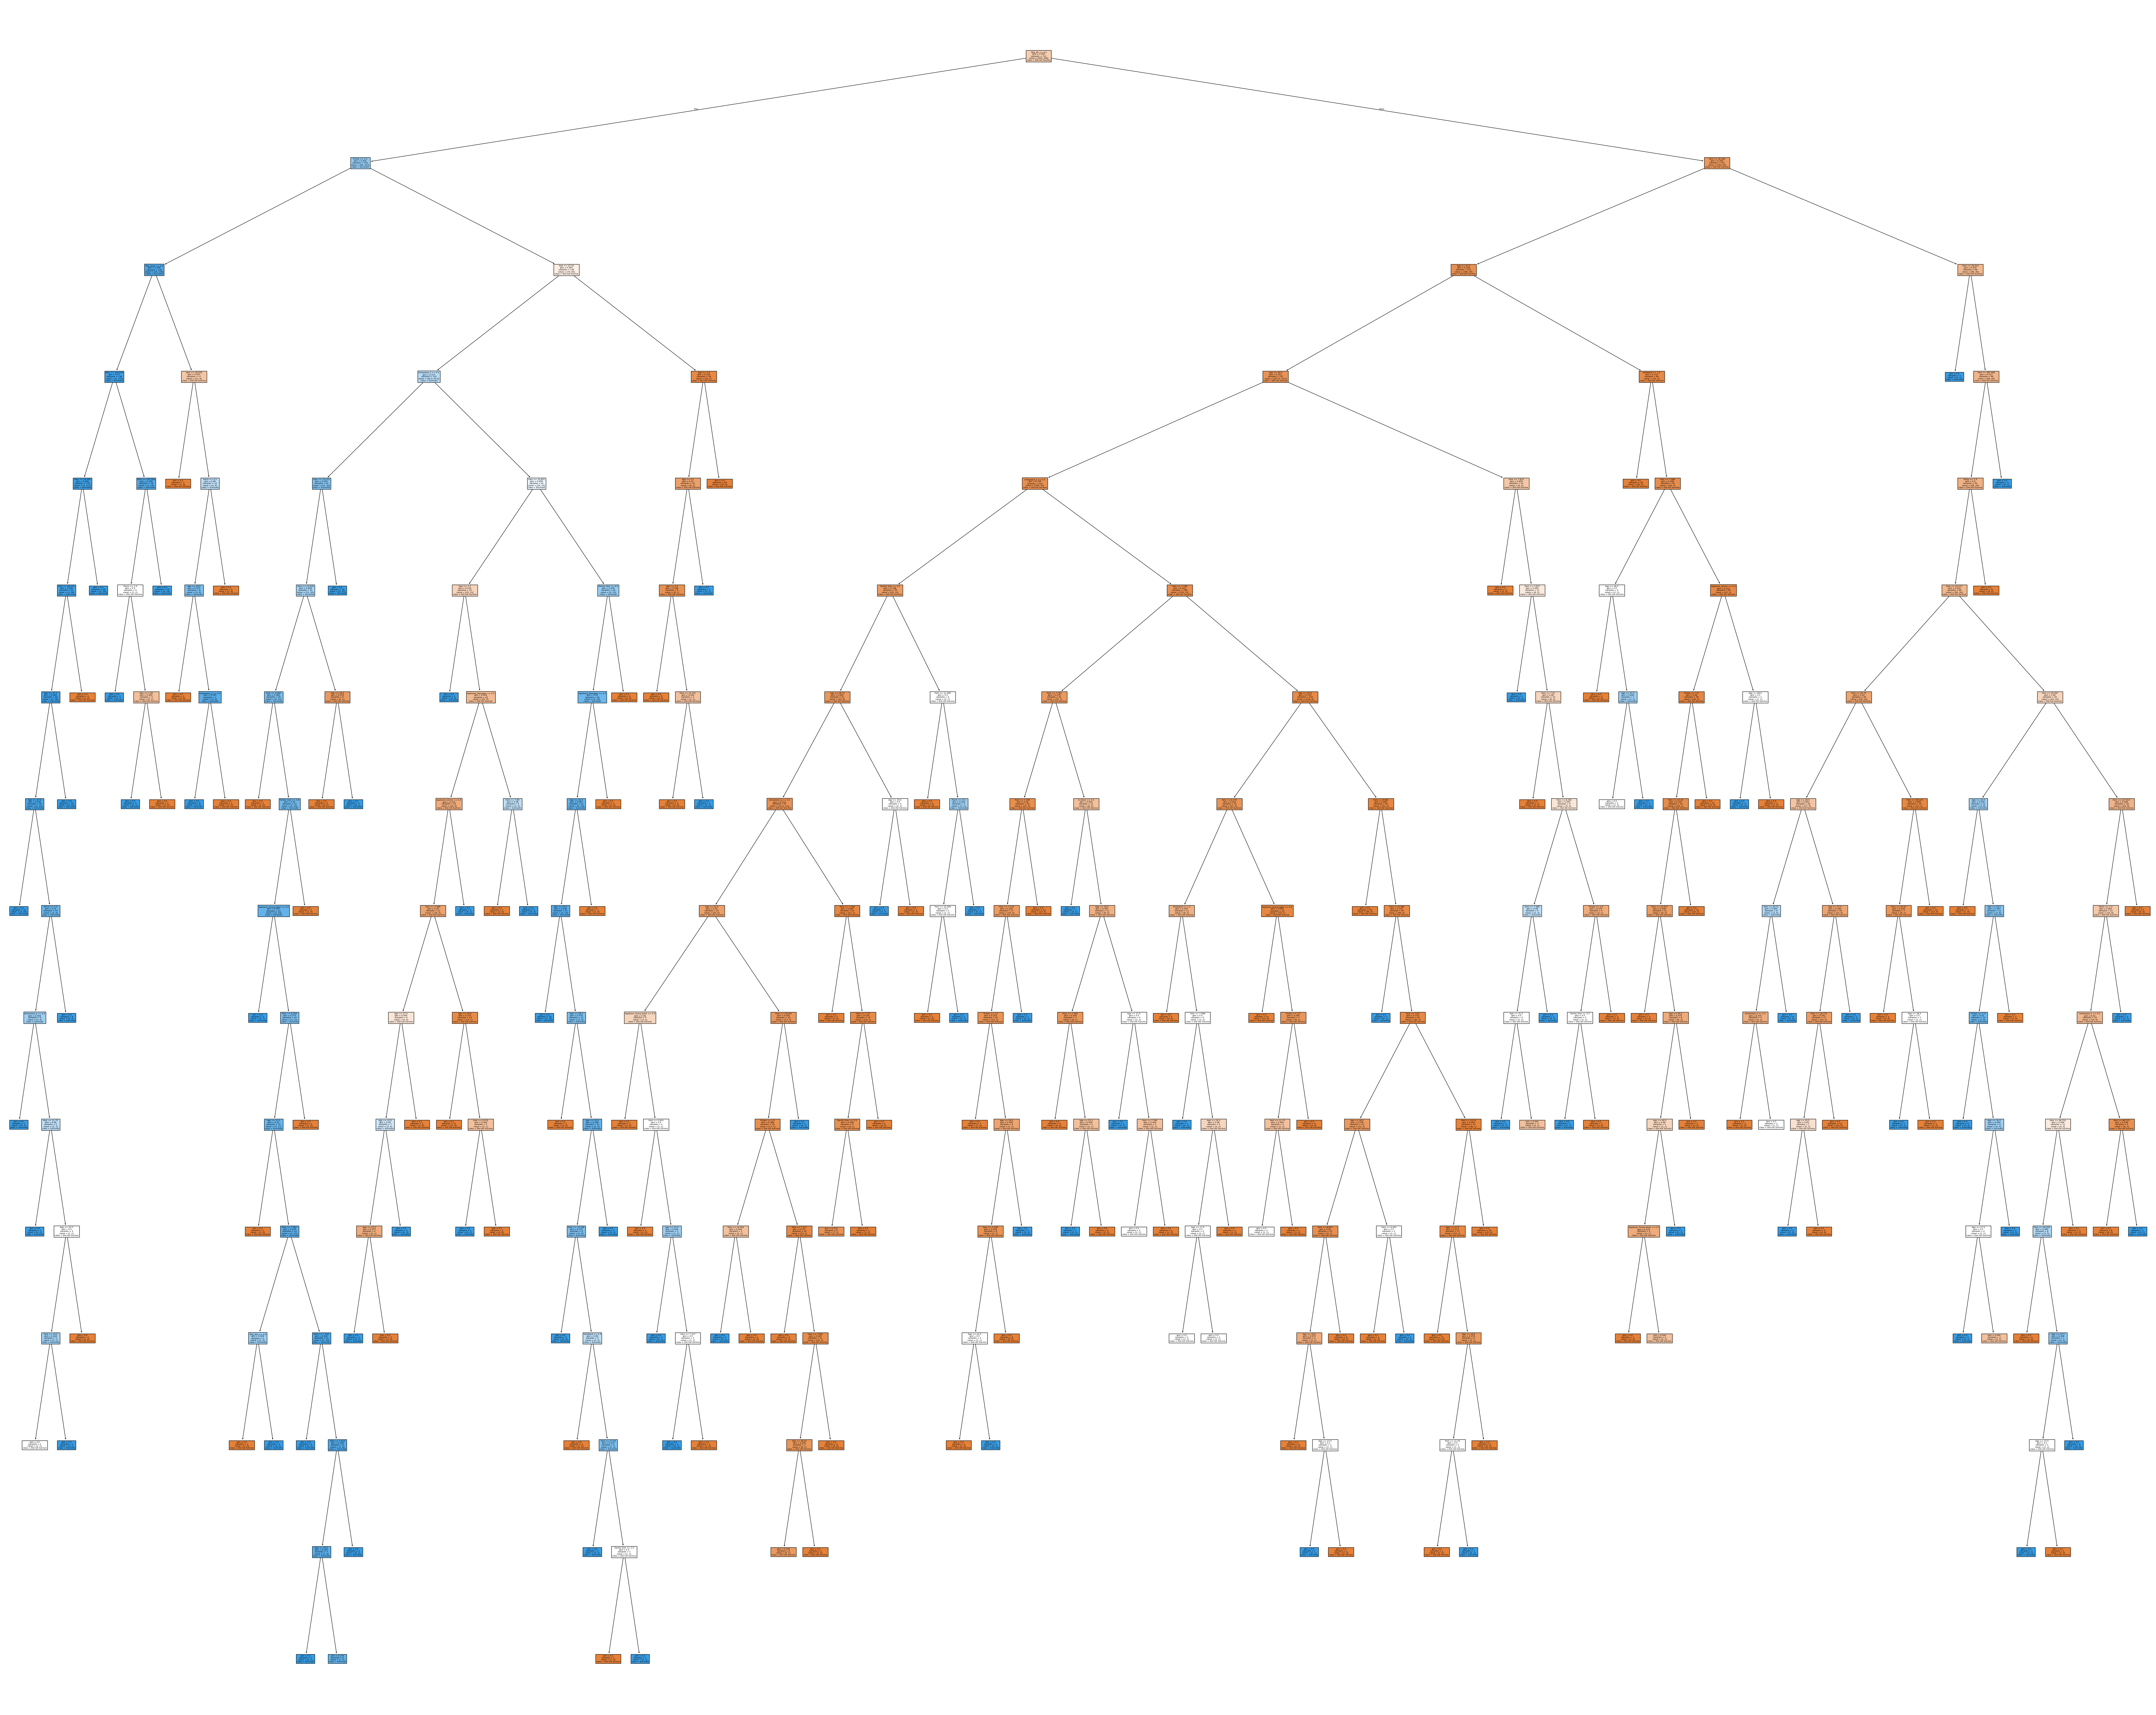

In [42]:
## Using a Random Forest to identify important features

rf_model = RandomForestClassifier(n_estimators=1000, max_depth=15, random_state=32521731)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8268156424581006
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       105
           1       0.79      0.80      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [43]:
## Lets find out the more important attributes using feature importance

feature_importances = pd.DataFrame( {
    'Features': X_train.columns, 
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(f"{feature_importances}")

               Features  Importance
4                  Fare    0.200558
1                   Age    0.177393
12             Title_Mr    0.128302
8              Sex_male    0.115718
0                Pclass    0.072982
5           Family Size    0.049920
13            Title_Mrs    0.044745
7              Fareband    0.042148
2                 SibSp    0.031938
11           Title_Miss    0.031889
10           Embarked_S    0.022387
3                 Parch    0.022001
16  Ageband_Young Adult    0.013185
6              Is Alone    0.010014
17        Ageband_Adult    0.009451
9            Embarked_Q    0.008541
14           Title_Rare    0.008128
15     Ageband_Teenager    0.007228
18       Ageband_Senior    0.003471


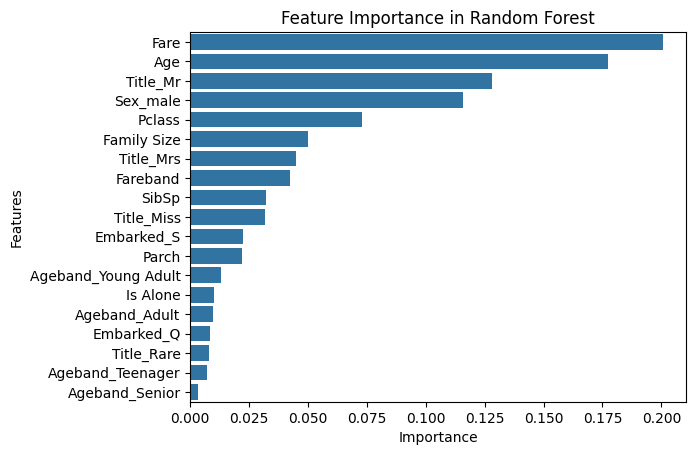

In [44]:
sns.barplot(x="Importance", y="Features", data=feature_importances)
plt.title("Feature Importance in Random Forest")
plt.show()

From the output of the features importance it can be seen that Fare, Afe, being Male, Family Size are the most important attributes


In [46]:
# Using GridSearchCV to find best parameter values

param_grid = {
    'n_estimators': [50, 100, 200, 500], 
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv = 5, scoring = 'accuracy', verbose=2, n_jobs=1)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: ", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_de

Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy:  0.8342263370432385

In [47]:
print(best_rf_model)

RandomForestClassifier(max_depth=5, random_state=32521731)


In [48]:
y_pred_best_rf_model = best_rf_model.predict(X_test)
accuracy_best_rf_model = accuracy_score(y_test, y_pred_best_rf_model)

print(f'Accuracy Report: {accuracy_best_rf_model}')
print(f'Classification Report: \n{classification_report(y_test, y_pred_best_rf_model)}')

Accuracy Report: 0.8156424581005587
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [49]:
import pandas as pd

# Creating a dictionary for the new passenger
new_passenger = {
    'Pclass': 1,
    'Age': 21,
    'SibSp': 1,
    'Parch': 2,
    'Fare': 12,
    'Family Size': 3 + 1,  # SibSp + Parch + 1
    'Is Alone': 0,  # Family Size logic
    'Fareband': 1,  # Assuming '15' falls in Fareband 2 (based on your binning logic)
    'Sex_male': False,  # Male = True
    'Embarked_Q': True,  # Embarked at Queenstown
    'Embarked_S': False,  # Not Southampton
    'Title_Miss': True,  # Not Miss
    'Title_Mr': False,  # Mr
    'Title_Mrs': False,  # Not Mrs
    'Title_Rare': False,  # Not a rare title
    'Ageband_Teenager': False,  # Age is not in teenager range
    'Ageband_Young Adult': True,  # Age falls in young adult range
    'Ageband_Adult': False,  # Not adult age
    'Ageband_Senior': False  # Not a senior
}

# Convert to a DataFrame (matching the structure of your model's input)
new_passenger_df = pd.DataFrame([new_passenger])

# Check structure
print(new_passenger_df)

   Pclass  Age  SibSp  Parch  Fare  Family Size  Is Alone  Fareband  Sex_male  \
0       1   21      1      2    12            4         0         1     False   

   Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  \
0        True       False        True     False      False       False   

   Ageband_Teenager  Ageband_Young Adult  Ageband_Adult  Ageband_Senior  
0             False                 True          False           False  


In [50]:
# Start prediction
prediction = best_rf_model.predict(new_passenger_df)

print(f"Prediction:", "Survived" if prediction[0] == 1 else "Did Not Survive")

## Check probabilities
probabilities = best_rf_model.predict_proba(new_passenger_df)
print(f'Probability of Survival: {probabilities[0][1]}')
print(f'Probability of Not Surviving: {probabilities[0][0]}')

Prediction: Survived
Probability of Survival: 0.7023205034397274
Probability of Not Surviving: 0.2976794965602722


# End of Project

I was able to generate a model that predicts the survivability of a passenger with an 82% accuracy score

In [56]:
# Testing on the test_csv from kaggle now

actual_test_data = pd.read_csv("test.csv")

print(actual_test_data.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [57]:
# Fill missing values (ensure these align with your training preprocessing steps)
actual_test_data['Age'].fillna(train_data['Age'].median(), inplace=True)
actual_test_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
actual_test_data['Embarked'].fillna('S', inplace=True)

In [58]:
# Example: Creating new features
actual_test_data['Family Size'] = actual_test_data['SibSp'] + actual_test_data['Parch'] + 1
actual_test_data['Is Alone'] = (actual_test_data['Family Size'] == 1).astype(int)

# One-hot encoding
actual_test_data = pd.get_dummies(actual_test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [59]:
# Drop irrelevant columns
actual_test_data = actual_test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Align test data columns with training data
missing_cols = set(X_train.columns) - set(actual_test_data.columns)
for col in missing_cols:
    actual_test_data[col] = 0  # Add missing columns with default values

actual_test_data = actual_test_data[X_train.columns]  # Reorder columns to match the training data

In [63]:
# Predict survival for the test data
test_predictions = best_rf_model.predict(actual_test_data)

# Optionally, get probabilities
test_probabilities = best_rf_model.predict_proba(actual_test_data)
print(test_probabilities)

[[0.6156151  0.3843849 ]
 [0.55582579 0.44417421]
 [0.6414846  0.3585154 ]
 [0.63953064 0.36046936]
 [0.42766984 0.57233016]
 [0.61389939 0.38610061]
 [0.36944757 0.63055243]
 [0.50309076 0.49690924]
 [0.3870048  0.6129952 ]
 [0.55460382 0.44539618]
 [0.64908444 0.35091556]
 [0.61443947 0.38556053]
 [0.19821827 0.80178173]
 [0.58062737 0.41937263]
 [0.25824389 0.74175611]
 [0.23521371 0.76478629]
 [0.62012192 0.37987808]
 [0.60051665 0.39948335]
 [0.51334588 0.48665412]
 [0.427037   0.572963  ]
 [0.45999331 0.54000669]
 [0.48114587 0.51885413]
 [0.25332306 0.74667694]
 [0.40851583 0.59148417]
 [0.26215007 0.73784993]
 [0.60308136 0.39691864]
 [0.17898134 0.82101866]
 [0.59282434 0.40717566]
 [0.55148623 0.44851377]
 [0.55413229 0.44586771]
 [0.58062737 0.41937263]
 [0.49175178 0.50824822]
 [0.47183079 0.52816921]
 [0.50929259 0.49070741]
 [0.4358486  0.5641514 ]
 [0.59051665 0.40948335]
 [0.4729787  0.5270213 ]
 [0.45751027 0.54248973]
 [0.63792639 0.36207361]
 [0.58424426 0.41575574]


In [62]:
# Combine predictions with PassengerId
submission = pd.DataFrame({
    'PassengerId': pd.read_csv("test.csv")['PassengerId'],
    'Survived': test_predictions
})

# Save to a CSV file for submission
submission.to_csv("submission.csv", index=False)
print("Submission file created!")

Submission file created!
